In [1]:
#set the wd to file location
setwd(getSrcDirectory(function(){})[1])

# dataClean Notebook
The purpose of this file is to define a function which cleans the data by removing columns. It may be expanded to increase the scope. It requires the following files:
<ul>
    <li> 01-vehicles-download.csv </li>
</ul>
It will produce the following files
<ul>
    <li> 02-vehicles-cleaned.csv </li>
</ul>
    

In [2]:
#Import Necessary libraries
library('tidyverse')
library('dplyr')
library('forcats')
#Read Data
vehicles = read.csv('./01-vehicles-download.csv',header=TRUE)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.2 ──
✔ ggplot2 3.3.6     ✔ purrr   0.3.5
✔ tibble  3.1.8     ✔ dplyr   1.1.0
✔ tidyr   1.2.1     ✔ stringr 1.4.1
✔ readr   2.1.3     ✔ forcats 0.5.2
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


## cleanData Function
The cleanData function takes the following inputs:
<ul>
    <li> df: the dataframe to be cleaned </li>
    <li>  vars: a list of vars to drop </li>
</ul>
The cleanData function creates a new dataframe object which is a copy of the original data frame with the following changes:
<ul>
    <li> it does not contain the columns in the vars list </li>
    <li> prices are within (1000,200000) </li>
    <li> observations with 1234 style prices are dropped </li>
    <li> missing valued rows are dropped </li>

</ul>

In [50]:
cleanData = function(df,vars){
    cleanedVehicles <<- df[ , !(names(df) %in% vars)]%>% #remove certain columns 
    filter(price>1000, price < 200000)%>% #remove cars outside of (1000,1000000)
    filter(price != 1234,price != 12345, price != 123456, price != 54321) %>% #remoce cars with prices following a pattern
    filter(odometer < 500000) %>%
    drop_na()%>% #drop missing values
    mutate_if(sapply(., is.character), as.factor) %>% #factorizes <chr> variables
    distinct()  # drops duplicate values
  
    
    return(cleanedVehicles)
    }

## Applying the cleanData function and saving the data
The above function is applied to our dataframe, then the data is saved

In [92]:
#applying the cleanData function to the vehicles dataset to filter for variables
filteredVars = c('id','url','region','region_url','VIN','image_url','description','lat','long','size','county','posting_date','model','title_status')

cleanVehicles = cleanData(vehicles,filteredVars)

In [93]:
#save the data
write.csv(cleanedVehicles, '02-vehicles-clean.csv',row.names=FALSE)
head(cleanVehicles)

,price,year,manufacturer,condition,cylinders,fuel,odometer,transmission,drive,type,paint_color,state
,<dbl>,<int>,<fct>,<fct>,<fct>,<fct>,<int>,<fct>,<fct>,<fct>,<fct>,<fct>
1,33590,2014,gmc,good,8 cylinders,gas,57923,other,,pickup,white,al
2,22590,2010,chevrolet,good,8 cylinders,gas,71229,other,,pickup,blue,al
3,39590,2020,chevrolet,good,8 cylinders,gas,19160,other,,pickup,red,al
4,30990,2017,toyota,good,8 cylinders,gas,41124,other,,pickup,red,al
5,15000,2013,ford,excellent,6 cylinders,gas,128000,automatic,rwd,truck,black,al
6,27990,2012,gmc,good,8 cylinders,gas,68696,other,4wd,pickup,black,al


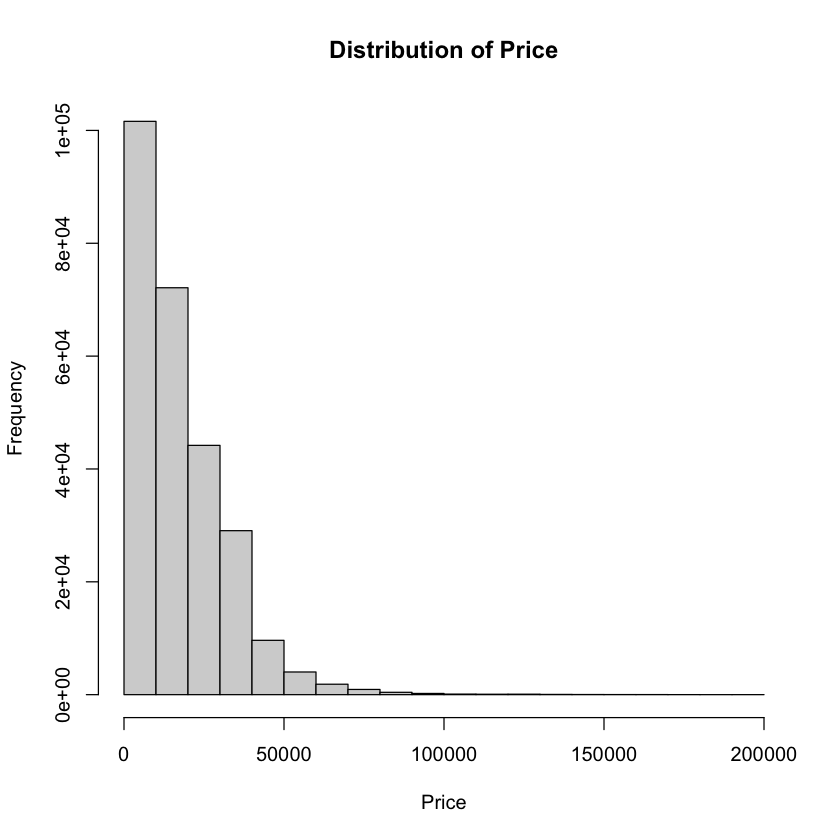

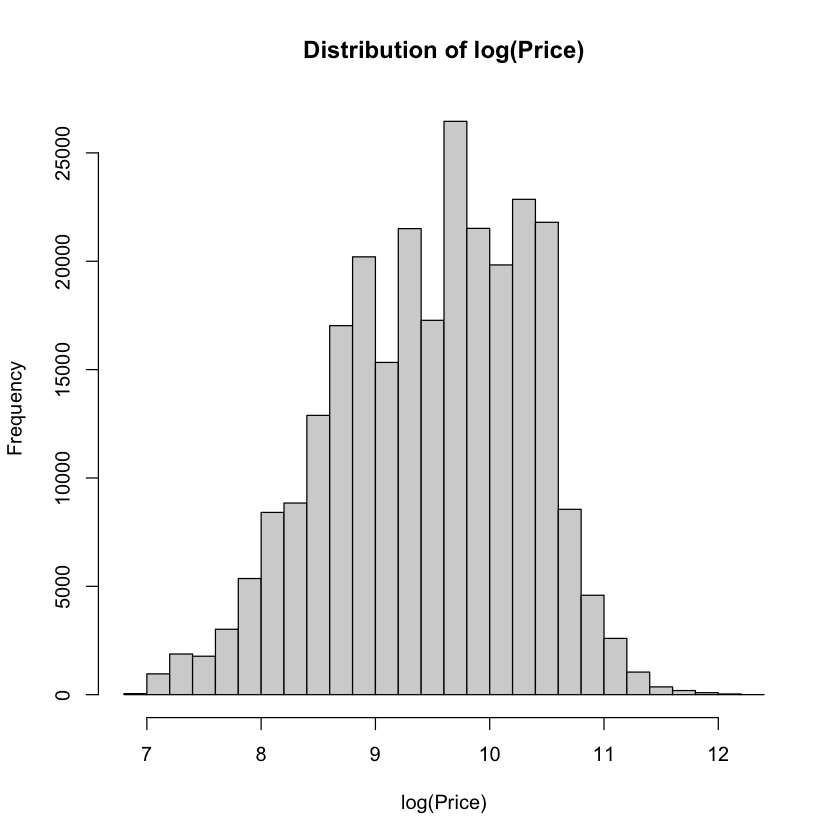

In [94]:
#Creating plots showing price
hist(cleanVehicles$price, xlab = 'Price', main = 'Distribution of Price')
hist(log(cleanVehicles$price), xlab ='log(Price)',main = 'Distribution of log(Price)')

In [ ]:
#create a correlagram
pairs(cleanVehicles)

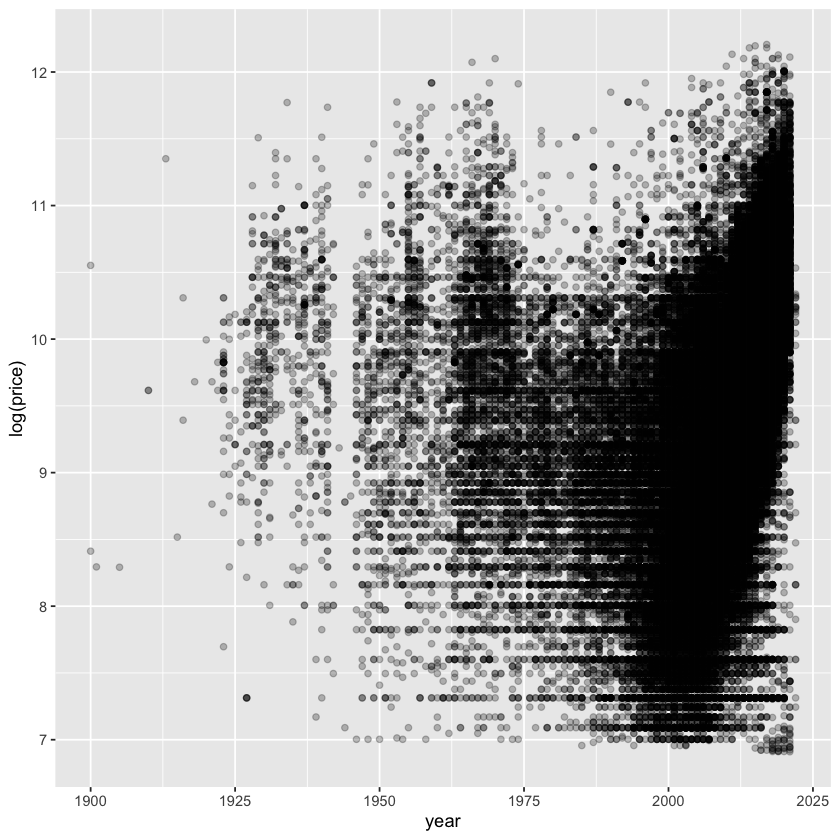

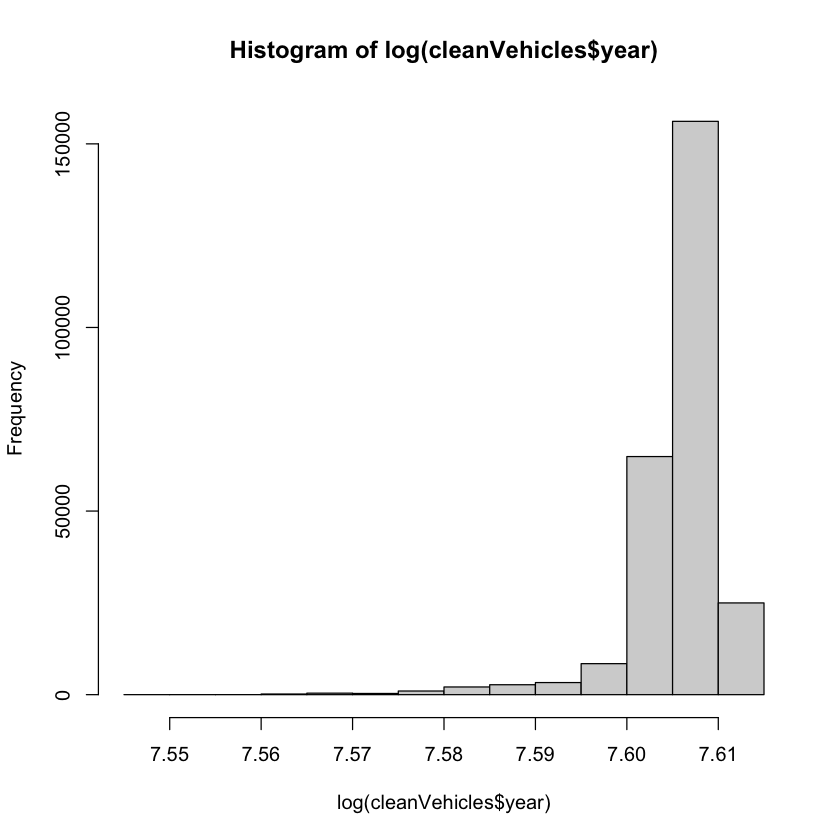

In [112]:
#creating plots for year
ggplot(cleanVehicles, aes(x = year,y = log(price))) + geom_point(alpha = 0.25)
hist(log(cleanVehicles$year))